
For LogisticRegression, Accuracy score is 0.9990653982786162 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209482
           1       0.64      0.36      0.46       233

    accuracy                           1.00    209715
   macro avg       0.82      0.68      0.73    209715
weighted avg       1.00      1.00      1.00    209715



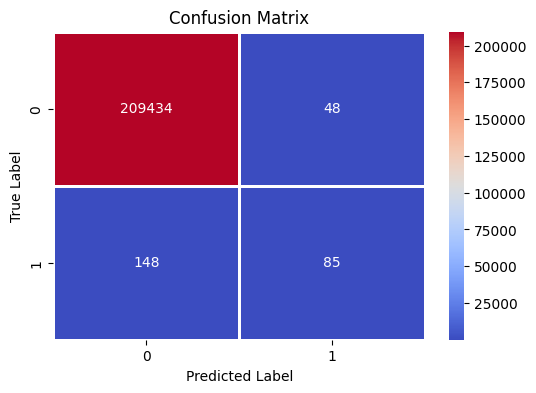


For KNeighborsClassifier, Accuracy score is 0.9994039529838114 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209482
           1       0.83      0.58      0.68       233

    accuracy                           1.00    209715
   macro avg       0.92      0.79      0.84    209715
weighted avg       1.00      1.00      1.00    209715



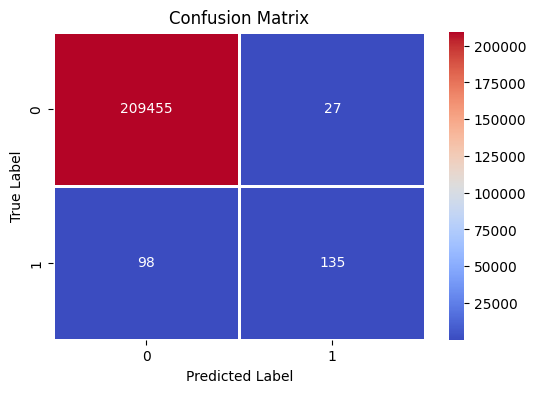


For DecisionTreeClassifier, Accuracy score is 0.9995946880289918 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209482
           1       0.81      0.82      0.82       233

    accuracy                           1.00    209715
   macro avg       0.91      0.91      0.91    209715
weighted avg       1.00      1.00      1.00    209715



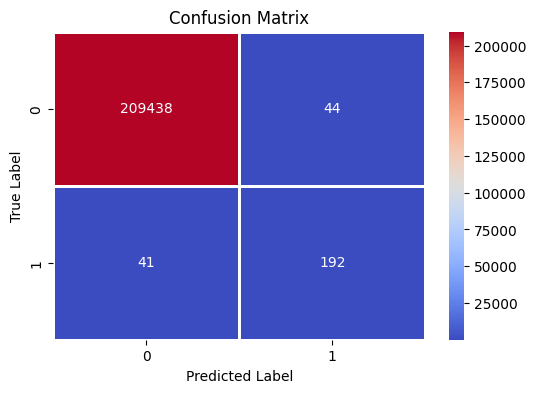


For RandomForestClassifier, Accuracy score is 0.9997806546980426 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209482
           1       0.99      0.81      0.89       233

    accuracy                           1.00    209715
   macro avg       0.99      0.91      0.95    209715
weighted avg       1.00      1.00      1.00    209715



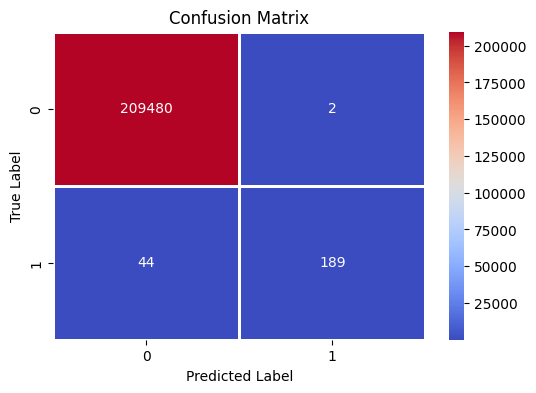

In [1]:
# For Data Analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


Fraud_D = pd.read_csv(r'C:\Users\DELL\Documents\Bhavya\ML_PROJECT\Fraud Detection Dataset1.csv')

Fraud_D.columns= ["step", "type", "amount", "customer_starting_transaction", "bal_before_transaction", 
            "bal_after_transaction", "recipient_of_transaction", "bal_of_recepient_before_transaction", "bal_of_receipient_after_transaction", "fraud_transaction"]

# create a function that properly labels isFraud
def Fraud (x):
    if x ==1:
        return "Fraudulent"
    else:
        return "not Fraudulent"
    
# create a new column
Fraud_D["fraud_transaction_label"] = Fraud_D["fraud_transaction"].apply(Fraud)

#To disable warnings
import warnings
warnings.filterwarnings("ignore")

categorical = ['type']
categories_dummies = pd.get_dummies(Fraud_D[categorical])

#view what you have done
categories_dummies.head()

Fraud_D = pd.concat([Fraud_D,categories_dummies], axis=1)

Fraud_D.drop(categorical, axis = 1, inplace = True)

Fraud_D.drop(columns=['fraud_transaction_label', 'customer_starting_transaction', 'recipient_of_transaction'], inplace=True)

y = Fraud_D.fraud_transaction
X = Fraud_D.drop(['fraud_transaction'], axis = 1)

## Train test split( training on 80% while testing is 20%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Initialize each models
LR = LogisticRegression(random_state=42)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)

#create list of your model names
models = [LR,KN,DC,RF]

def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

from sklearn.metrics import confusion_matrix

#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test, prediction)) #use this later
    plot_confusion_matrix(y_test,prediction)


#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)
